# 1.Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 2. Load the data and make sure there are no extra index columns. Show the shape of the data AND the head of the data

In [5]:
files.upload()

Saving messed_up_iris.xlsx to messed_up_iris.xlsx


{'messed_up_iris.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00B;>\xc9\\\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [10]:
filename = 'messed_up_iris.xlsx'
data = pd.read_excel(filename)

In [15]:
#making sure thers is the right index 
data = data.drop(columns = data.columns[0])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color,origin
0,5.1,3.5,1.4,0.2,setosa,green,usa
1,4.9,3.0,1.4,0.2,setosa,yellow,usa
2,4.7,3.2,1.3,0.2,setosa,green,usa
3,4.6,3.1,1.5,0.2,setosa,orange,japan
4,5.0,3.6,1.4,0.2,setosa,blue,europe


In [17]:
#show the shape of the data
data.shape

(150, 7)

# 3. Remove columns and rows where there are more than 50% of the data missing. Show the shape of the data after you have removed those columns/rows

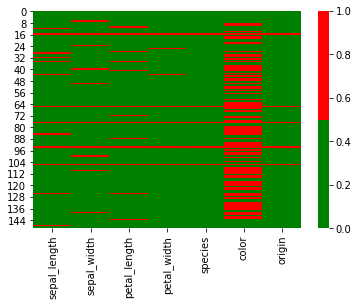

In [19]:
#have a visualization of the missing data
sns.heatmap(data.isnull(),cmap=['Green', 'Red'])

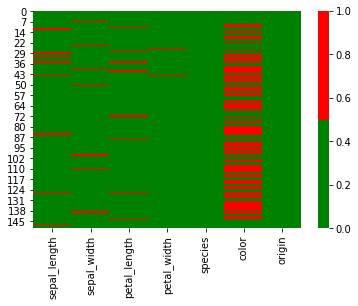

In [47]:
#dropping those when 50% of the data are missing
data_dropna = data.dropna(thresh = len(data.columns)/2)
sns.heatmap(data_dropna.isnull(),cmap=['Green', 'Red'])

In [50]:
#the color column seems to be mssing more than 50 percent of the rows so droppping it
data_dropped = data_dropna.dropna(thresh = len(data.index)/2,axis = 1)

In [51]:
data_dropped.shape

(145, 6)

# 4.Remove duplicate data, if there is any. Show the shape of the data

In [52]:
any(data_dropped.duplicated())
#so yes there are some duplicated data

True

In [53]:
#drop duplicates
data1 = data_dropped.drop_duplicates(ignore_index=True)

In [54]:
data1.shape

(140, 6)

# 5.Dummy code the categorical data. Show the head of the data

In [60]:
data1.head()
#there are two categorical variables:species and origin

,sepal_length,sepal_width,petal_length,petal_width,species,origin
0,5.1,3.5,1.4,0.2,setosa,usa
1,4.9,3.0,1.4,0.2,setosa,usa
2,4.7,3.2,1.3,0.2,setosa,usa
3,4.6,3.1,1.5,0.2,setosa,japan
4,5.0,3.6,1.4,0.2,setosa,europe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


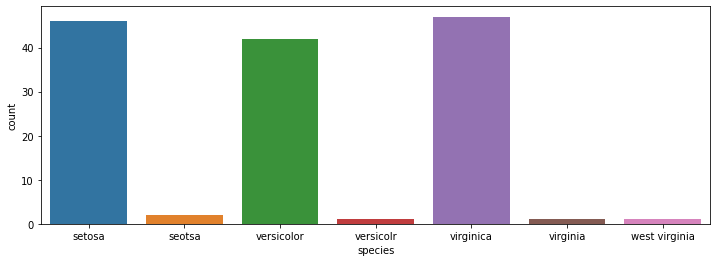

In [68]:
#first let's look at the sunplot of species
plt.figure(figsize=[12,4])
sns.countplot(data1['species'])

In [97]:
#it seems that some of the data got their names wrong so first change their names
right_species = []
for i in data1['species']:
  if i=='seotsa':
    right_species.append('setosa')
  elif i=='versicolr':
    right_species.append('versicolor')
  elif i=='virginia':
    right_species.append('virginica')
  elif i =='west virginia':
    right_species.append('virginica')
  else:
    right_species.append(i)

In [106]:
#replace the right species names
data1['species']= right_species

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


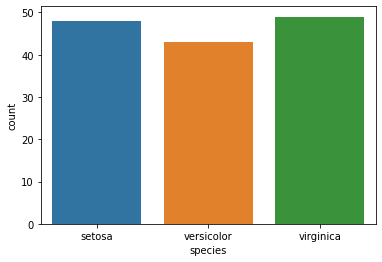

In [126]:
#now the names are fixed
sns.countplot(data1['species'])

In [148]:
#now we can do the dummies 
species = pd.get_dummies(data1['species'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


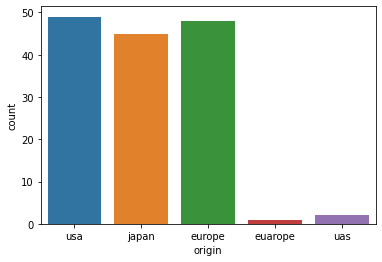

In [62]:
#the sunplot of origin
sns.countplot(data['origin'])

In [113]:
#fixing the names of origins
data1['origin'] = np.where(data1['origin']=='euarope','europe',data1['origin'])
data1['origin'] = np.where(data1['origin']=='uas','usa',data1['origin'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


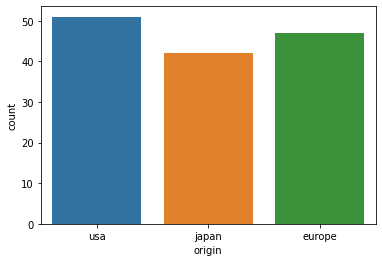

In [116]:
sns.countplot(data1['origin'])

In [149]:
#the dummy of origin
origin_df = pd.get_dummies(data1['origin'])

In [150]:
#show the head of the dummy category
species.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [151]:
#the head of dummy variables of origin
origin_df.head()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


# 6.Drop the redundant columns from the dataframe so that you are left with just the dummy coded columns. Show the head of the data

In [152]:
#combinging the data
full_data = pd.concat([data1,species,origin_df],axis = 1)
full_data = full_data.drop(columns = ['species','origin'])

In [154]:
#show the head of the data. I am not dropping the first category columns because dropping it will leave the third category name to disappear.
full_data.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,europe,japan,usa
0,5.1,3.5,1.4,0.2,1,0,0,0,0,1
1,4.9,3.0,1.4,0.2,1,0,0,0,0,1
2,4.7,3.2,1.3,0.2,1,0,0,0,0,1
3,4.6,3.1,1.5,0.2,1,0,0,0,1,0
4,5.0,3.6,1.4,0.2,1,0,0,1,0,0


# 7.Remove outliers above 2 standard deviations.

In [162]:
#define a function that helps detect the outliers and removes it
def remove_outliers(line):

  threshold_upper = line.mean()+2*line.std()
  threshold_lower = line.mean()-2*line.std()


  return np.where((line > threshold_upper) | (line < threshold_lower),np.nan,line)

In [167]:
#utilizing the function and replace the outliers with nan values
for column in full_data.columns:
  if isinstance(full_data[column][0],float)==1:
    full_data[column] = remove_outliers(full_data[column])

# 8.For the remaining missing data, replace with the median value. 



In [170]:
#calculate all medians
sep_len_mid = full_data['sepal_length'].median()
sep_wid_mid = full_data['sepal_width'].median()
pet_len_mid = full_data['petal_length'].median()
pet_wid_mid = full_data['petal_width'].median()

In [172]:
#filling the nans
filled = {'sepal_length':sep_len_mid,'sepal_width':sep_wid_mid,'petal_length':pet_len_mid,'petal_width':pet_wid_mid}
full_data = full_data.fillna(filled)

# 10. Show that there are no missing data and also use the describe method to show off the final dataset.

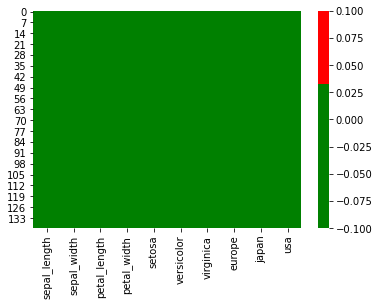

In [175]:
sns.heatmap(full_data.isnull(),cmap=['Green','Green','Red'])

In [182]:
full_data.info()
#140 non-null in all data set so yeah it was completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  140 non-null    float64
 1   sepal_width   140 non-null    float64
 2   petal_length  140 non-null    float64
 3   petal_width   140 non-null    float64
 4   setosa        140 non-null    uint8  
 5   versicolor    140 non-null    uint8  
 6   virginica     140 non-null    uint8  
 7   europe        140 non-null    uint8  
 8   japan         140 non-null    uint8  
 9   usa           140 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 5.3 KB
